<a href="https://colab.research.google.com/github/prximenes/neural-networks-if702/blob/main/MiniProjeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                      Centro de Informática - UFPE

                  Miniprojeto 3 de Redes Neurais - iF702
                                  03/2021
```
                  Alunos: ADRIANO NASCIMENTO DE SANTANA
                  BELARMINO GORLACH LIRA
                  JOÃO VITOR DA SILVA GOMES
                  PEDRO RAFAEL XIMENES DO CARMO

                  Professor: Germano Vasconcelos

```

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import io

import matplotlib.pyplot as plt
import numpy as np
import sklearn
keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.optimizers import Adam

from keras.callbacks import EarlyStopping
from keras import backend
from keras.utils.vis_utils import plot_model

def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [ ]:
!wget https://raw.githubusercontent.com/brynmwangy/predicting-bitcoin-prices-using-LSTM/master/btc.csv


--2021-04-06 08:47:08--  https://raw.githubusercontent.com/brynmwangy/predicting-bitcoin-prices-using-LSTM/master/btc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81054 (79K) [text/plain]
Saving to: ‘btc.csv’

btc.csv             100%[===================>]  79.15K  --.-KB/s    in 0.006s  

2021-04-06 08:47:08 (12.7 MB/s) - ‘btc.csv’ saved [81054/81054]



In [ ]:
btc = pd.read_csv('btc.csv')
btc.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,5/26/2018,BTCUSD,7459.1100,7640.4600,7380.0000,7520.0000,2722.8000,20422651.8100
1,5/25/2018,BTCUSD,7584.1500,7661.8500,7326.9400,7459.1100,8491.9300,63420692.8200
2,5/24/2018,BTCUSD,7505.0000,7734.9900,7269.0000,7584.1500,11033.7200,82931373.7600
3,5/23/2018,BTCUSD,7987.7000,8030.0000,7433.1900,7505.0000,14905.9900,114810431.5000
4,5/22/2018,BTCUSD,8393.4400,8400.0000,7950.0000,7987.7000,6589.4300,53897527.4800


In [ ]:
btc.shape

(1273, 8)

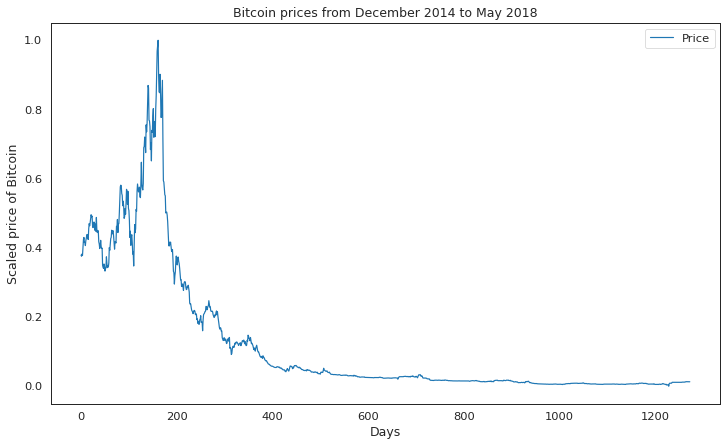

In [ ]:
from sklearn.preprocessing import StandardScaler

data_to_use = btc.Close.values #numpy.ndarray
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_use.reshape(-1, 1))
#plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled price of Bitcoin')
plt.plot(scaled_data, label='Price')
plt.legend()
plt.show()

In [ ]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

def lstm_pred_prices(params):

  #Preparando os dados
  X, y = window_data(scaled_data, params['window_size'])


  #we now split the data into training and test set
  import numpy as np
  X_train  = np.array(X[:760])
  y_train = np.array(y[:760])

  X_valid = np.array(X[760:1013])
  y_valid = np.array(y[760:1013])

  X_test = np.array(X[1013:])
  y_test = np.array(y[1013:])
  print("X_train size: {}".format(X_train.shape))
  print("y_train size: {}".format(y_train.shape))
  print("X_valid size: {}".format(X_valid.shape))
  print("y_valid size: {}".format(y_valid.shape))
  print("X_test size: {}".format(X_test.shape))
  print("y_test size: {}".format(y_test.shape))

  #CRIANDO MODELO

  if params['hidden_layers'] == 0:
    model = Sequential()
    model.add(LSTM(units=params['neurons'],return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

  if params['hidden_layers'] == 1:
    model = Sequential()
    model.add(LSTM(units=params['neurons'],return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=params['neurons'],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

  if params['hidden_layers'] == 2:
    model = Sequential()
    model.add(LSTM(units=params['neurons'],return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=params['neurons'],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=params['neurons'],return_sequences=True))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

  loss_function = 'mse'
  optimizer='adam'

  model.compile(loss=loss_function, optimizer=Adam(learning_rate=params['learning_rate']), metrics= [rmse])

  history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=200, batch_size=params['batch_size'], callbacks=[EarlyStopping(monitor='val_loss', patience=100)], verbose=1)

  plot_model(model, to_file='model_plot_.png', show_shapes=True, show_layer_names=True)

  model.summary()

  train_predict_ = model.predict(X_train)
  test_predict_ = model.predict(X_test)
  print("train_predict_ size: {}".format(train_predict_.shape))
  print("X_train size: {}".format(X_train.shape))
  print("test_predict_ size: {}".format(X_valid.shape))
  print("y_valid size: {}".format(X_test.shape))

  # invert predictions
  train_predict = scaler.inverse_transform(train_predict_[:,0])
  Y_train = scaler.inverse_transform(y_train)
  test_predict = scaler.inverse_transform(test_predict_[:,0])
  Y_test = scaler.inverse_transform(y_test)

  print('Train Mean Absolute Error (MAE):', mean_absolute_error(Y_train, train_predict[:,0]))
  print('Train Root Mean Squared Error (RMSE):',np.sqrt(mean_squared_error(Y_train, train_predict[:,0])))
  print('Test Mean Absolute Error (MAE):', mean_absolute_error(Y_test, test_predict[:,0]))
  print('Test Root Mean Squared Error (RMSE):',np.sqrt(mean_squared_error(Y_test, test_predict[:,0])))
  
  plt.figure(figsize=(8,4))
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend(loc='upper right')
  plt.show();

  aa=[x for x in range(len(Y_train))]
  plt.figure(figsize=(8,4))
  plt.plot(aa, Y_train, marker='.', label="actual - train")
  plt.plot(aa, train_predict[:,0], 'r', label="prediction - train")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  plt.tight_layout()
  sns.despine(top=True)
  plt.subplots_adjust(left=0.07)
  plt.ylabel('BTC PRICE', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();
  
  aa=[x for x in range(len(Y_test))]
  plt.figure(figsize=(8,4))
  plt.plot(aa, Y_test, marker='.', label="actual")
  plt.plot(aa, test_predict[:,0], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  plt.tight_layout()
  sns.despine(top=True)
  plt.subplots_adjust(left=0.07)
  plt.ylabel('BTC PRICE', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();

X_train size: (760, 7, 1)
y_train size: (760, 1)
X_valid size: (253, 7, 1)
y_valid size: (253, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)
Epoch 1/200
109/109 [==============================] - 3s 11ms/step - loss: 0.0197 - rmse: 0.0911 - val_loss: 4.6335e-04 - val_rmse: 0.0215
Epoch 2/200
109/109 [==============================] - 1s 7ms/step - loss: 0.0031 - rmse: 0.0394 - val_loss: 1.2049e-04 - val_rmse: 0.0110
Epoch 3/200
109/109 [==============================] - 1s 6ms/step - loss: 0.0022 - rmse: 0.0327 - val_loss: 1.4498e-04 - val_rmse: 0.0120
Epoch 4/200
109/109 [==============================] - 1s 6ms/step - loss: 0.0024 - rmse: 0.0315 - val_loss: 7.5321e-05 - val_rmse: 0.0087
Epoch 5/200
109/109 [==============================] - 1s 6ms/step - loss: 0.0023 - rmse: 0.0318 - val_loss: 1.5067e-04 - val_rmse: 0.0122
Epoch 6/200
109/109 [==============================] - 1s 6ms/step - loss: 0.0021 - rmse: 0.0336 - val_loss: 4.3336e-05 - val_rmse: 0.0066
Epoch 7/200
109/109 

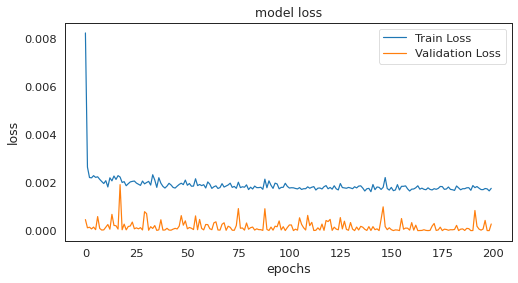

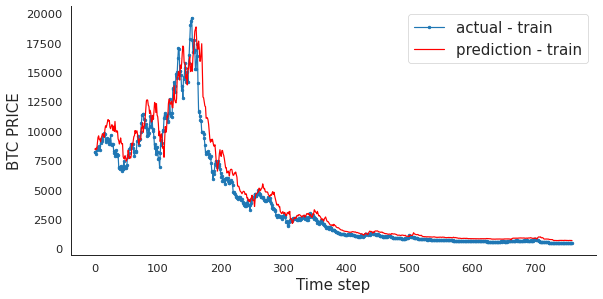

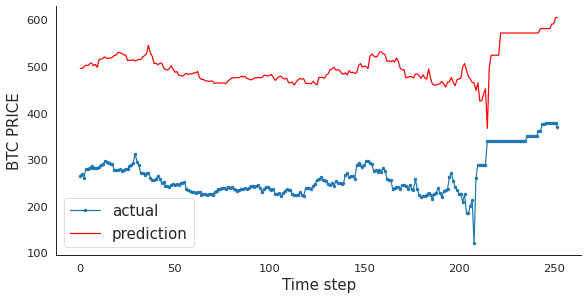

In [ ]:
params = { 'window_size': 7,
           'neurons': 50,
           'hidden_layers':0,
           'learning_rate': 0.01,
           'batch_size': 7}
           
lstm_pred_prices(params)

X_train size: (760, 7, 1)
y_train size: (760, 1)
X_valid size: (253, 7, 1)
y_valid size: (253, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)
Epoch 1/200
6/6 [==============================] - 2s 114ms/step - loss: 0.0714 - rmse: 0.1882 - val_loss: 0.0080 - val_rmse: 0.0895
Epoch 2/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0192 - rmse: 0.1039 - val_loss: 0.0036 - val_rmse: 0.0598
Epoch 3/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0104 - rmse: 0.0805 - val_loss: 0.0039 - val_rmse: 0.0628
Epoch 4/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0077 - rmse: 0.0711 - val_loss: 0.0035 - val_rmse: 0.0587
Epoch 5/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0068 - rmse: 0.0686 - val_loss: 0.0033 - val_rmse: 0.0572
Epoch 6/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0052 - rmse: 0.0600 - val_loss: 0.0023 - val_rmse: 0.0482
Epoch 7/200
6/6 [==============================] - 0s 14ms/ste

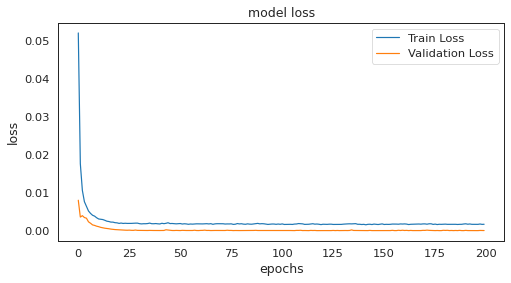

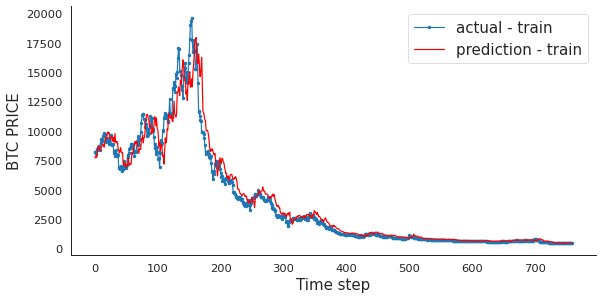

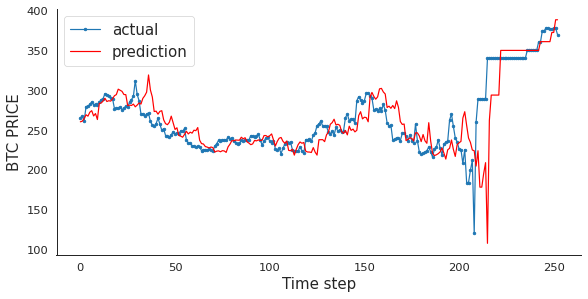

In [ ]:
params = { 'window_size': 7,
           'neurons': 50,
           'hidden_layers':0,
           'learning_rate': 0.01,
           'batch_size': 128}
           
lstm_pred_prices(params)

X_train size: (760, 7, 1)
y_train size: (760, 1)
X_valid size: (253, 7, 1)
y_valid size: (253, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)
Epoch 1/200
6/6 [==============================] - 2s 115ms/step - loss: 0.0539 - rmse: 0.1608 - val_loss: 0.0105 - val_rmse: 0.1027
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0110 - rmse: 0.0932 - val_loss: 0.0049 - val_rmse: 0.0703
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0073 - rmse: 0.0754 - val_loss: 0.0045 - val_rmse: 0.0673
Epoch 4/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0051 - rmse: 0.0651 - val_loss: 0.0040 - val_rmse: 0.0629
Epoch 5/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0046 - rmse: 0.0601 - val_loss: 0.0028 - val_rmse: 0.0528
Epoch 6/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0036 - rmse: 0.0515 - val_loss: 0.0021 - val_rmse: 0.0459
Epoch 7/200
6/6 [==============================] - 0s 18ms/ste

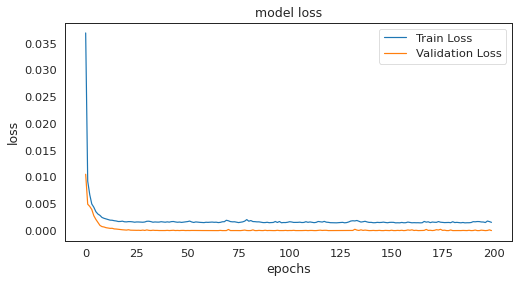

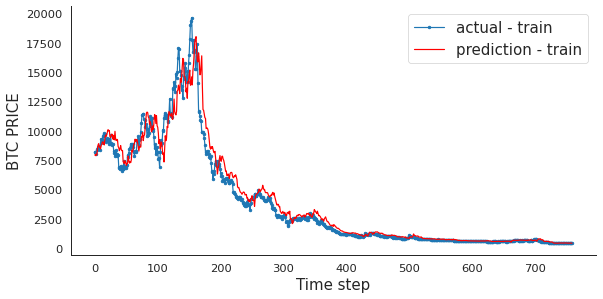

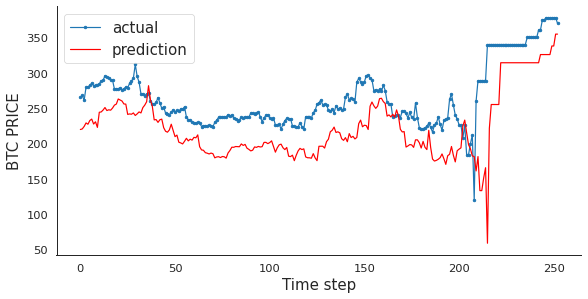

In [ ]:
params = { 'window_size': 7,
           'neurons': 256,
           'hidden_layers':0,
           'learning_rate': 0.01,
           'batch_size': 128}
           
lstm_pred_prices(params)

X_train size: (760, 7, 1)
y_train size: (760, 1)
X_valid size: (253, 7, 1)
y_valid size: (253, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.0976 - rmse: 0.2067 - val_loss: 5.3132e-05 - val_rmse: 0.0065
Epoch 2/200
1/1 [==============================] - 0s 68ms/step - loss: 0.0889 - rmse: 0.1935 - val_loss: 3.6720e-05 - val_rmse: 0.0058
Epoch 3/200
1/1 [==============================] - 0s 66ms/step - loss: 0.0809 - rmse: 0.1808 - val_loss: 1.2925e-04 - val_rmse: 0.0110
Epoch 4/200
1/1 [==============================] - 0s 62ms/step - loss: 0.0732 - rmse: 0.1690 - val_loss: 3.3303e-04 - val_rmse: 0.0180
Epoch 5/200
1/1 [==============================] - 0s 62ms/step - loss: 0.0665 - rmse: 0.1598 - val_loss: 6.5328e-04 - val_rmse: 0.0254
Epoch 6/200
1/1 [==============================] - 0s 71ms/step - loss: 0.0599 - rmse: 0.1521 - val_loss: 0.0011 - val_rmse: 0.0330
Epoch 7/200
1/1 [============================

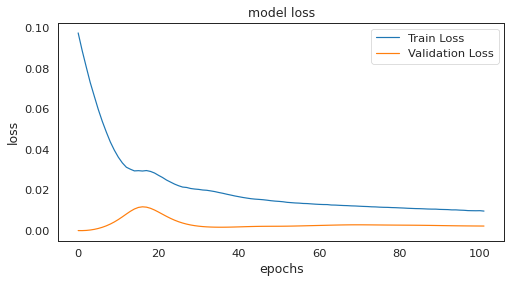

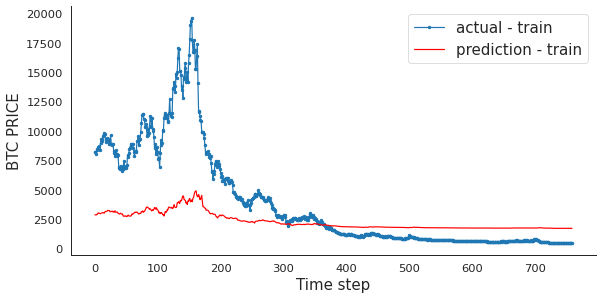

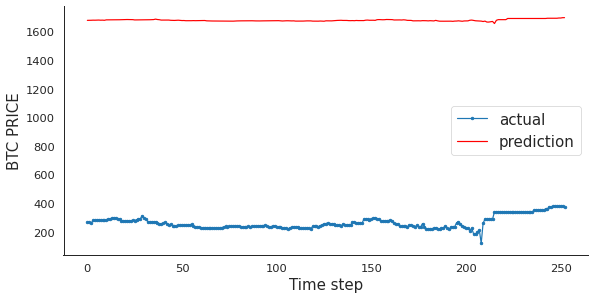

In [ ]:
params = { 'window_size': 7,
           'neurons': 256,
           'hidden_layers':0,
           'learning_rate': 0.0005,
           'batch_size': 1024}
           
lstm_pred_prices(params)

X_train size: (760, 7, 1)
y_train size: (760, 1)
X_valid size: (253, 7, 1)
y_valid size: (253, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)
Epoch 1/200
12/12 [==============================] - 6s 128ms/step - loss: 0.0525 - rmse: 0.1671 - val_loss: 0.0106 - val_rmse: 0.1030
Epoch 2/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0171 - rmse: 0.1095 - val_loss: 0.0064 - val_rmse: 0.0799
Epoch 3/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0071 - rmse: 0.0699 - val_loss: 0.0015 - val_rmse: 0.0385
Epoch 4/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0049 - rmse: 0.0540 - val_loss: 7.9398e-04 - val_rmse: 0.0282
Epoch 5/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0035 - rmse: 0.0450 - val_loss: 5.3431e-04 - val_rmse: 0.0231
Epoch 6/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0028 - rmse: 0.0392 - val_loss: 8.4916e-04 - val_rmse: 0.0291
Epoch 7/200
12/12 [===================

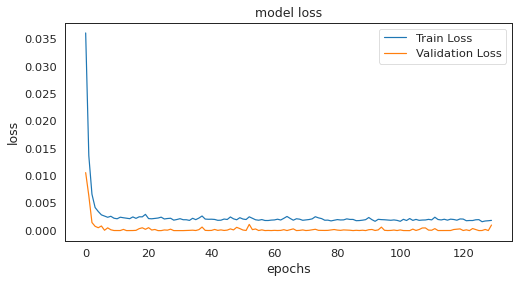

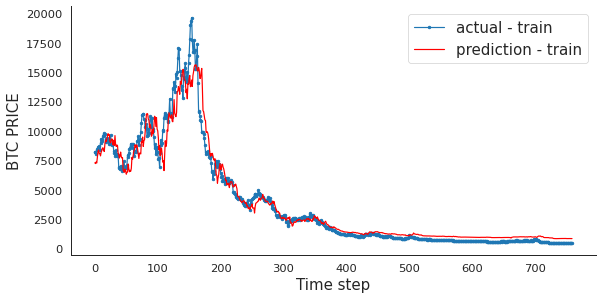

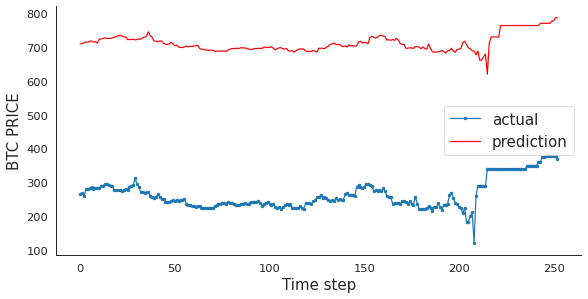

In [ ]:
params = { 'window_size': 7,
           'neurons': 50,
           'hidden_layers':2,
           'learning_rate': 0.01,
           'batch_size': 64}
           
lstm_pred_prices(params)

X_train size: (760, 7, 1)
y_train size: (760, 1)
X_valid size: (253, 7, 1)
y_valid size: (253, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)
Epoch 1/200
6/6 [==============================] - 2s 122ms/step - loss: 0.1089 - rmse: 0.2619 - val_loss: 0.0068 - val_rmse: 0.0821
Epoch 2/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0406 - rmse: 0.1601 - val_loss: 0.0063 - val_rmse: 0.0796
Epoch 3/200
6/6 [==============================] - 0s 24ms/step - loss: 0.0245 - rmse: 0.1214 - val_loss: 0.0057 - val_rmse: 0.0757
Epoch 4/200
6/6 [==============================] - 0s 25ms/step - loss: 0.0134 - rmse: 0.0969 - val_loss: 0.0051 - val_rmse: 0.0715
Epoch 5/200
6/6 [==============================] - 0s 24ms/step - loss: 0.0083 - rmse: 0.0777 - val_loss: 0.0047 - val_rmse: 0.0682
Epoch 6/200
6/6 [==============================] - 0s 24ms/step - loss: 0.0061 - rmse: 0.0689 - val_loss: 0.0030 - val_rmse: 0.0544
Epoch 7/200
6/6 [==============================] - 0s 24ms/ste

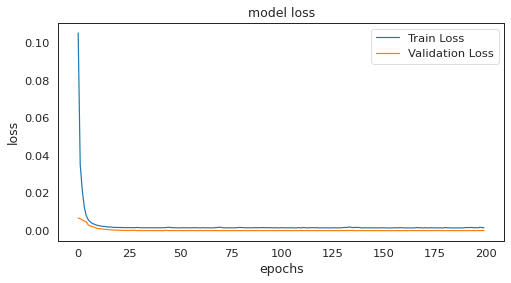

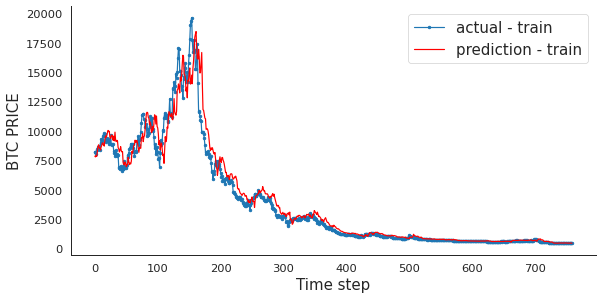

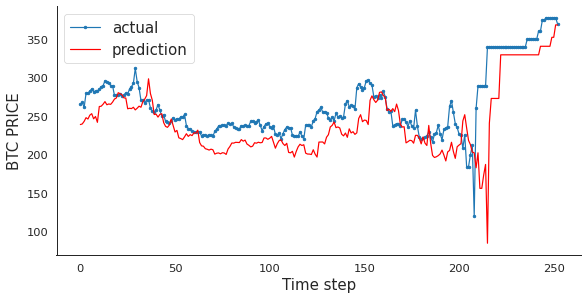

In [ ]:
params = { 'window_size': 7,
           'neurons': 512,
           'hidden_layers':0,
           'learning_rate': 0.01,
           'batch_size': 128}
           
lstm_pred_prices(params)

X_train size: (760, 7, 1)
y_train size: (760, 1)
X_valid size: (253, 7, 1)
y_valid size: (253, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)
Epoch 1/200
6/6 [==============================] - 6s 260ms/step - loss: 0.0699 - rmse: 0.1910 - val_loss: 0.0179 - val_rmse: 0.1338
Epoch 2/200
6/6 [==============================] - 0s 22ms/step - loss: 0.0351 - rmse: 0.1405 - val_loss: 0.0058 - val_rmse: 0.0758
Epoch 3/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0227 - rmse: 0.1121 - val_loss: 0.0079 - val_rmse: 0.0887
Epoch 4/200
6/6 [==============================] - 0s 22ms/step - loss: 0.0182 - rmse: 0.1097 - val_loss: 0.0108 - val_rmse: 0.1039
Epoch 5/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0157 - rmse: 0.1063 - val_loss: 0.0091 - val_rmse: 0.0952
Epoch 6/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0114 - rmse: 0.0927 - val_loss: 0.0058 - val_rmse: 0.0759
Epoch 7/200
6/6 [==============================] - 0s 23ms/ste

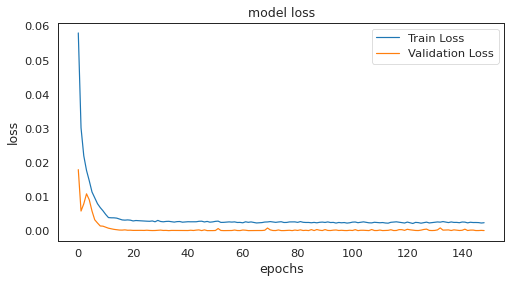

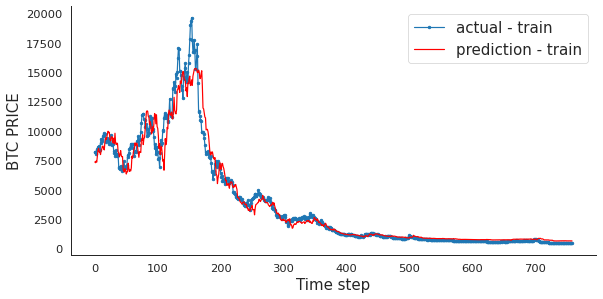

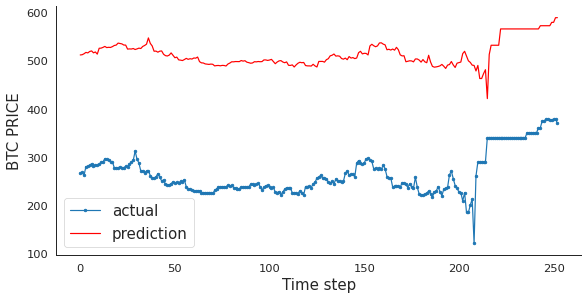

In [ ]:
params = { 'window_size': 7,
           'neurons': 20,
           'hidden_layers':2,
           'learning_rate': 0.01,
           'batch_size': 128}
           
lstm_pred_prices(params)